In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = yf.download('BTC-USD','2015-01-01','2023-11-30')

C:\Users\admin\AppData\Local\Temp\ipykernel_788\3540120103.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('BTC-USD','2015-01-01','2023-11-30')
[*********************100%***********************]  1 of 1 completed


In [3]:
data = pd.DataFrame(data)

In [4]:
data.reset_index(inplace=True)

In [6]:
# Don't drop 'Adj Close' since it's not in data
data.drop(columns = ['Date','Open','High','Low','Volume'], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_788\2814157270.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data.drop(columns = ['Date','Open','High','Low','Volume'], inplace=True)


In [7]:
data

Price,Close
Ticker,BTC-USD
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
3250,37796.792969
3251,37479.121094
3252,37254.167969


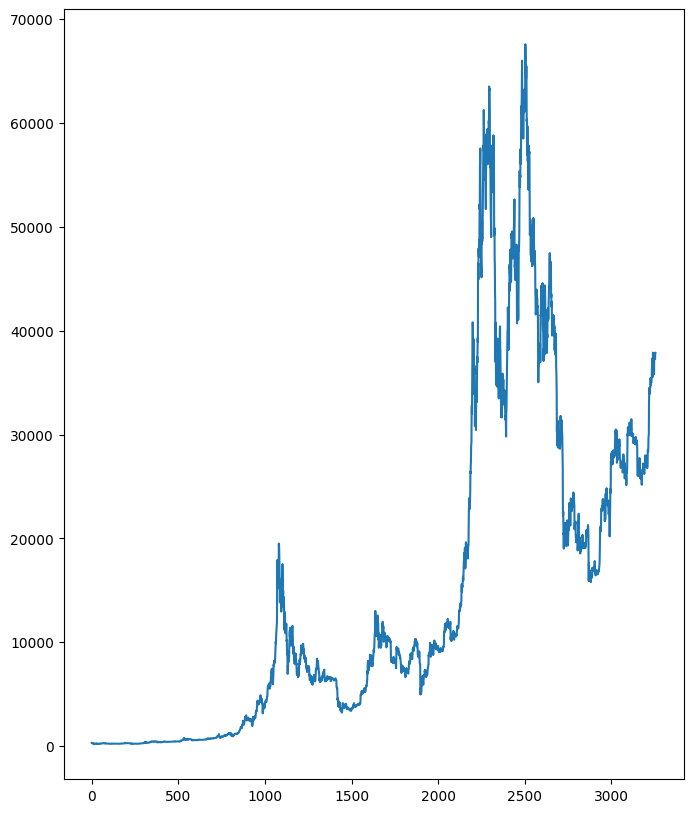

In [8]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show()

In [9]:
train_data = data[:-100]
test_data = data[-100:]

In [10]:
train_data.shape

(3155, 1)

In [11]:
test_data.shape

(100, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
train_data_scale = scaler.fit_transform(train_data)

In [14]:
base_days = 100

In [15]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input

In [21]:
model = Sequential()

# Use the Input layer for defining the input shape
model.add(Input(shape=(x.shape[1], 1)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [24]:
model.fit(x, y, epochs = 50, verbose =1 )

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 30s 247ms/step - loss: 0.0149
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - loss: 0.0048
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 230ms/step - loss: 0.0043
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 242ms/step - loss: 0.0040
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 234ms/step - loss: 0.0039
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 230ms/step - loss: 0.0034
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 44s 258ms/step - loss: 0.0034
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 350s 4s/step - loss: 0.0032
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 419ms/step - loss: 0.0033
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 419ms/step - loss: 0.0032
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 262ms/step - loss: 0.0029
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 273ms/step - loss: 0.0032
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 265ms/step - loss: 0.0028
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 322ms/step - loss: 0.0028
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 41

In [25]:
test_data

Price,Close
Ticker,BTC-USD
3155,26031.656250
3156,26431.640625
3157,26162.373047
3158,26047.667969
3159,26008.462891
...,...
3250,37796.792969
3251,37479.121094
3252,37254.167969


In [26]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [68]:
test_data

,Close
0,26930.638672
1,27192.693359
2,27036.650391
3,27398.802734
4,26832.208984
...,...
195,37796.792969
196,37479.121094
197,37254.167969
198,37831.085938


In [27]:
test_data_scale = scaler.transform(test_data)

In [28]:
x = []
y = [] 

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [29]:
x, y = np.array(x), np.array(y)

In [30]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [31]:
pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step


In [32]:
pred

array([[0.39077318],
       [0.38430145],
       [0.38127935],
       [0.3811669 ],
       [0.38278311],
       [0.38494712],
       [0.38700038],
       [0.38867503],
       [0.39184135],
       [0.3962856 ],
       [0.39927167],
       [0.39959043],
       [0.39759254],
       [0.39418027],
       [0.39026195],
       [0.3865837 ],
       [0.38362357],
       [0.38220155],
       [0.38207328],
       [0.38270885],
       [0.3835416 ],
       [0.3833986 ],
       [0.3827548 ],
       [0.38265997],
       [0.3839376 ],
       [0.38660187],
       [0.3899218 ],
       [0.39300483],
       [0.39560625],
       [0.39817023],
       [0.40062875],
       [0.40202475],
       [0.40211415],
       [0.40115303],
       [0.39914215],
       [0.39653423],
       [0.39380032],
       [0.39154816],
       [0.39094993],
       [0.3921466 ],
       [0.39458442],
       [0.39867806],
       [0.40333045],
       [0.4073056 ],
       [0.4104429 ],
       [0.4122169 ],
       [0.41331273],
       [0.414

In [33]:
pred = scaler.inverse_transform(pred)

In [34]:
pred

array([[26511.81 ],
       [26075.69 ],
       [25872.033],
       [25864.455],
       [25973.37 ],
       [26119.2  ],
       [26257.566],
       [26370.418],
       [26583.793],
       [26883.285],
       [27084.512],
       [27105.994],
       [26971.357],
       [26741.41 ],
       [26477.36 ],
       [26229.486],
       [26030.008],
       [25934.18 ],
       [25925.535],
       [25968.365],
       [26024.484],
       [26014.846],
       [25971.46 ],
       [25965.072],
       [26051.168],
       [26230.71 ],
       [26454.438],
       [26662.2  ],
       [26837.504],
       [27010.287],
       [27175.965],
       [27270.04 ],
       [27276.064],
       [27211.295],
       [27075.783],
       [26900.041],
       [26715.805],
       [26564.035],
       [26523.72 ],
       [26604.361],
       [26768.645],
       [27044.51 ],
       [27358.027],
       [27625.908],
       [27837.326],
       [27956.875],
       [28030.723],
       [28089.502],
       [28139.4  ],
       [28147.547],


In [35]:
#future Bitcoin Price

In [36]:
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━

In [37]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [38]:
z

array([[38383.5558345 ],
       [38523.1676335 ],
       [38746.9168499 ],
       [39027.94795436],
       [39341.74312593],
       [39674.48899857],
       [40020.70681936],
       [40378.97468321],
       [40749.18815644],
       [41131.84129079],
       [41526.8417026 ],
       [41933.85199067],
       [42352.40622001],
       [42781.94205526],
       [43221.99757811],
       [43674.69359614],
       [44141.37971418],
       [44622.91951863],
       [45119.28489275],
       [45629.68053368],
       [46152.51583573],
       [46685.573591  ],
       [47226.29115697],
       [47772.55575943],
       [48322.0578068 ],
       [48872.23867326],
       [49420.2665987 ],
       [49963.14112238],
       [50497.82965014],
       [51021.37590473]])

In [39]:
model.save('Bitcoin_Price_prediction_Model.keras')